# Comparing Male and Female Dentate Gyrus Responses to NAtural Scenes and Natural Movies

### Name: Deborah Agorua    


### Date: 10/2/2022


### PID: 730397647


### Jupyter Notebook Number: 55417611

## Purpose/Objective:
Explore and filter neuropixels datasets for natural movies and natural scenes data. Compare data from male and female mice. Attempt to create graphs.

## Protocol:
1. Filter neuropixels data for natural movies and natural scenes responses
2. Create code that allows for comparison of male and female responses to these visual stimuli
3. Calculate spike mean averages
4. Create graphs to comapre male and female mice

## Expected Results:
Numerical values that allow for comparison of male and female responses to natural scenes and movies. Also, graphs of data should be created.

### Installing AllenSDK into your local environment. 

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [86]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: Neuropixels Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [2]:
#this code block should only be run if you are working with the neuropixels data
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = '/overflow/NSCI274/projects/ecephysdata/' 

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

### Import sessions data

In [3]:
data_directory = "/overflow/NSCI274/projects/ecephysdata/"

manifest_path = os.path.join(data_directory,"manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


### Discover the number of sessions for male mice and female mice

In [38]:
filtered_sessionsm = sessions[(sessions.sex == 'M') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of male sessions: ' + str(len(filtered_sessionsm)))

filtered_sessionsm.head()

Total number of male sessions: 22


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [129]:
# filtered_sessions_scenes = sessions[(session.stimulus_name == 'natural_scenes') & \
#                              (sessions.session_type == 'brain_observatory_1.1') & \
#                              (['DG' in acronyms for acronyms in 
#                                sessions.ecephys_structure_acronyms])]

# print('Total number of male sessions: ' + str(len(filtered_sessionsm)))

# filtered_sessionsm.head()

In [40]:
filtered_sessionsf = sessions[(sessions.sex == 'F') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of female sessions: ' + str(len(filtered_sessionsf)))

filtered_sessionsf.head()

Total number of female sessions: 3


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."


### Create units table

In [41]:
session_idm = filtered_sessionsm.index.values[2]

sessionm = cache.get_session_data(session_idm)

session_idf = filtered_sessionsf.index.values[2]

#sessionf = cache.get_session_data(session_idf)
sessionf = cache.get_session_data(session_idf)

In [12]:
filtered_sessions_scenes = sessions[(sessionm.stimulus_names == 'natural_scenes') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
filtered_sessions_scenes.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,


In [42]:
unitsm = sessionm.units

print('Total number of male units: ' + str(len(unitsm)))
themlist=unitsm['ecephys_structure_acronym'].to_list()
resmlist=[*set(themlist)]
print(resmlist)
unitsm.head()

Total number of male units: 444
['CA1', 'VISrl', 'APN', 'SCig', 'VIS', 'CA3', 'MB', 'LP', 'LGv', 'VISl', 'VISal', 'DG', 'POL', 'VISam', 'VISp']


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950907205,1.054721,101.262915,0.012123,1,250.13,5.252421,14.739577,0.005100,129.172458,0.002403,...,313.0,MB,8456.0,3144.0,6920.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907524,0.558508,136.843200,0.002313,154,279.40,5.439966,1.448536,0.000000,50.450187,0.004085,...,313.0,MB,8447.0,3127.0,6924.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907209,0.637890,114.131278,0.084063,3,0.00,3.246909,0.040263,0.000000,19.926951,0.023899,...,313.0,MB,8447.0,3127.0,6924.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907526,0.576049,85.886190,0.024568,155,532.46,5.347055,0.376838,0.000000,66.773857,0.000197,...,313.0,MB,8433.0,3102.0,6929.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907216,0.651440,79.630785,0.002750,6,262.20,5.657655,8.277175,0.007249,89.982684,0.002184,...,313.0,MB,8419.0,3077.0,6934.0,probeA,See electrode locations,29999.970785,1249.998783,True


In [43]:
unitsf = sessionf.units

print('Total number of female units: ' + str(len(unitsf)))
thelist=unitsf['ecephys_structure_acronym'].to_list()
reslist=[*set(thelist)]
print(reslist)
unitsf.head(100)

Total number of female units: 825
['CA1', 'Eth', 'ProS', 'TH', 'NOT', 'VISrl', 'APN', 'CA3', 'CA2', 'MB', 'LP', 'VISl', 'VISal', 'DG', 'SUB', 'VISam', 'LGv', 'VISp']


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951088679,0.620607,82.147455,0.023654,1,480.97,2.575648,7.429131,0.053350,51.364291,0.028062,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088664,0.587044,78.399165,0.001739,0,427.07,3.085334,6.843864,0.033732,40.358293,0.051513,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088734,0.560996,187.504005,0.001249,5,311.01,5.152564,1.418476,0.356931,56.950961,0.001292,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088721,0.474457,196.741545,0.000059,4,355.17,4.295014,11.517381,0.000271,58.358552,0.020218,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088862,0.534674,92.125020,0.089901,16,239.50,4.043348,19.953126,0.013619,79.934237,0.011335,...,215.0,APN,8304.0,2958.0,7103.0,probeA,See electrode locations,29999.965974,1249.998582,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951092912,0.343048,74.986080,0.015427,306,331.55,2.625901,3.275160,0.050214,51.855880,0.003558,...,394.0,VISam,7687.0,819.0,7500.0,probeA,See electrode locations,29999.965974,1249.998582,True
951094783,0.062807,109.564845,0.001595,443,193.46,3.262489,5.224870,0.040776,59.900239,0.002028,...,394.0,VISam,7682.0,801.0,7503.0,probeA,See electrode locations,29999.965974,1249.998582,True
951093080,0.576623,107.448315,0.029407,320,76.37,4.238720,30.788574,0.004470,106.205546,0.000916,...,394.0,VISam,7682.0,801.0,7503.0,probeA,See electrode locations,29999.965974,1249.998582,True


### Filter units for Hippocampus Areas

In [44]:
DG_unitsm = unitsm[(unitsm.ecephys_structure_acronym == 'DG')]

print('Total number of DG units: ' + str(len(DG_unitsm)))

DG_unitsm.head()

Total number of DG units: 41


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950907256,8.229653,95.517010,0.036145,24,0.00,NaN,0.060853,0.000000,NaN,NaN,...,726.0,DG,7988.0,2274.0,7154.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907719,0.502406,236.327130,0.000141,61,61.46,6.647542,19.238828,0.016309,116.666580,0.001909,...,726.0,DG,7567.0,2175.0,7376.0,probeB,See electrode locations,29999.923119,1249.996797,True
950907721,1.413915,91.812045,0.020535,62,557.58,5.496564,7.212420,0.008813,68.094419,0.003849,...,726.0,DG,7571.0,2144.0,7379.0,probeB,See electrode locations,29999.923119,1249.996797,True
950907717,0.271389,135.051930,0.001925,60,105.04,5.201824,3.694890,0.039178,51.061316,0.027779,...,726.0,DG,7571.0,2144.0,7379.0,probeB,See electrode locations,29999.923119,1249.996797,True
950907733,0.326786,110.713395,0.097751,68,250.69,3.088837,5.344538,0.120377,48.654929,0.032234,...,726.0,DG,7575.0,2103.0,7383.0,probeB,See electrode locations,29999.923119,1249.996797,True


In [45]:
DG_unitsf = unitsf[(unitsf.ecephys_structure_acronym == 'DG')]

print('Total number of female DG units: ' + str(len(DG_unitsf)))

DG_unitsf.head()

Total number of female DG units: 31


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951090214,0.585876,112.724820,0.000105,105,73.01,6.211980,10.497929,0.028347,71.667279,0.004208,...,726.0,DG,8019.0,2162.0,7291.0,probeA,See electrode locations,29999.965974,1249.998582,True
951099104,2.118498,44.899725,0.063431,302,266.39,3.514698,10.437201,0.007911,91.509599,0.004821,...,726.0,DG,7747.0,2334.0,7452.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095747,0.534207,154.266645,0.000431,62,65.84,4.256822,3.500400,0.000000,71.319775,0.008970,...,726.0,DG,7747.0,2334.0,7452.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095759,0.261311,110.880510,0.001318,64,102.72,5.066305,1.408227,0.000000,74.749922,0.000563,...,726.0,DG,7750.0,2312.0,7451.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095847,0.327950,34.730475,0.056136,69,108.71,2.694005,0.130964,0.000000,33.023656,0.016339,...,726.0,DG,7754.0,2282.0,7449.0,probeB,See electrode locations,29999.917201,1249.996550,True


In [133]:
CA1_unitsm = unitsm[(unitsm.ecephys_structure_acronym == 'CA1')]

print('Total number of male CA1 units: ' + str(len(CA1_unitsm)))

CA1_unitsm.head()

Total number of male CA1 units: 71


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950907546,0.244961,122.157165,0.000854,165,127.42,4.346751,4.082628,0.082517,58.423581,0.011486,...,382.0,CA1,7698.0,1633.0,7510.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907296,0.304593,72.153510,0.033786,43,158.56,4.418858,4.882172,0.309350,66.664742,0.002773,...,382.0,CA1,7690.0,1614.0,7523.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907552,0.269583,90.767235,0.021036,168,143.71,4.718096,4.488108,0.434338,71.190553,0.001355,...,382.0,CA1,7682.0,1595.0,7537.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907301,0.425438,179.623275,0.000147,45,84.29,7.952308,10.390707,0.000000,124.364300,0.000006,...,382.0,CA1,7682.0,1595.0,7537.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907306,0.346616,90.277590,0.014060,47,91.75,3.999452,7.578033,0.304699,62.652103,0.021101,...,382.0,CA1,7666.0,1557.0,7564.0,probeA,See electrode locations,29999.970785,1249.998783,True


In [132]:
CA1_unitsf = unitsf[(unitsf.ecephys_structure_acronym == 'CA1')]

print('Total number of female CA1 units: ' + str(len(CA1_unitsf)))

CA1_unitsf.head()

Total number of female CA1 units: 134


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951090304,0.333859,89.288550,0.038819,113,312.85,6.242016,1.297859,0.234531,58.642258,0.004726,...,382.0,CA1,7992.0,2048.0,7314.0,probeA,See electrode locations,29999.965974,1249.998582,True
951090343,0.292568,132.045420,0.000124,117,111.33,8.947342,5.936790,0.001019,138.117306,0.000024,...,382.0,CA1,7972.0,1963.0,7331.0,probeA,See electrode locations,29999.965974,1249.998582,True
951090551,0.459167,76.795680,0.023637,134,108.88,6.013265,12.530606,0.009376,134.098763,0.000087,...,382.0,CA1,7914.0,1713.0,7379.0,probeA,See electrode locations,29999.965974,1249.998582,True
951090717,0.112590,88.053225,0.009336,146,189.37,4.432711,2.133175,0.252520,54.604829,0.010484,...,382.0,CA1,7900.0,1655.0,7389.0,probeA,See electrode locations,29999.965974,1249.998582,True
951090679,0.328555,151.869315,0.001703,143,185.62,3.566460,2.321047,0.346604,47.531026,0.022615,...,382.0,CA1,7893.0,1621.0,7394.0,probeA,See electrode locations,29999.965974,1249.998582,True


In [136]:
CA3_unitsm = unitsm[(unitsm.ecephys_structure_acronym == 'CA3')]

print('Total number of male CA3 units: ' + str(len(CA3_unitsm)))

CA3_unitsm.head()

Total number of male CA3 units: 10


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950909583,0.410678,116.500800,0.032153,270,280.39,5.261019,6.622643,0.006098,59.768920,0.013978,...,463.0,CA3,7927.0,3370.0,8666.0,probeD,See electrode locations,29999.923530,1249.996814,True
950909164,0.812153,118.097460,0.012017,65,250.94,3.459251,13.927610,0.083509,56.290464,0.050416,...,463.0,CA3,7944.0,3325.0,8687.0,probeD,See electrode locations,29999.923530,1249.996814,True
950909160,0.661843,121.816890,0.043753,62,273.57,2.471769,5.058720,0.182137,35.275256,0.116370,...,463.0,CA3,7944.0,3325.0,8687.0,probeD,See electrode locations,29999.923530,1249.996814,True
950911151,0.355969,150.825870,0.078970,298,195.69,2.474091,1.081448,0.297752,49.131256,0.008799,...,463.0,CA3,7812.0,2800.0,7979.0,probeE,See electrode locations,30000.003698,1250.000154,True
950910006,0.377384,168.359685,0.020772,73,154.47,2.932607,5.841432,0.055563,83.053982,0.001869,...,463.0,CA3,7812.0,2800.0,7979.0,probeE,See electrode locations,30000.003698,1250.000154,True


In [139]:
CA3_unitsf = unitsf[(unitsf.ecephys_structure_acronym == 'CA3')]

print('Total number of female CA3 units: ' + str(len(CA3_unitsf)))

CA3_unitsf.head()

Total number of female CA3 units: 21


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951105844,9.163186,66.835860,0.067086,6,208.98,5.965344,23.679412,0.042715,373.369671,0.002308,...,463.0,CA3,7772.0,3404.0,9328.0,probeD,See electrode locations,29999.919900,1249.996662,True
951110743,0.314635,81.467880,0.000002,57,88.04,8.194917,10.107611,0.000000,245.887201,0.000001,...,463.0,CA3,7951.0,3566.0,8725.0,probeE,See electrode locations,29999.999422,1249.999976,True
951110751,0.490192,101.784735,0.000077,58,55.71,8.434880,17.052731,0.000000,139.218616,0.000001,...,463.0,CA3,7953.0,3530.0,8749.0,probeE,See electrode locations,29999.999422,1249.999976,True
951110765,0.587430,51.794145,0.029724,60,146.29,5.465326,3.614398,0.104450,84.711593,0.000104,...,463.0,CA3,7957.0,3482.0,8780.0,probeE,See electrode locations,29999.999422,1249.999976,True
951110789,0.401787,96.360030,0.021409,64,331.82,2.424002,3.202537,0.276590,48.363320,0.011580,...,463.0,CA3,7958.0,3463.0,8793.0,probeE,See electrode locations,29999.999422,1249.999976,True


In [22]:
presentation_table = sessionm.stimulus_presentations[sessionm.stimulus_presentations.stimulus_name == 'natural_scenes']

presentation_table.head()

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
51353,null,null,92.0,null,null,null,null,5905.128132,9.0,natural_scenes,5905.378346,null,null,null,0.250214,4908
51354,null,null,114.0,null,null,null,null,5905.378346,9.0,natural_scenes,5905.628560,null,null,null,0.250214,4909
51355,null,null,114.0,null,null,null,null,5905.628560,9.0,natural_scenes,5905.878774,null,null,null,0.250214,4909
51356,null,null,0.0,null,null,null,null,5905.878774,9.0,natural_scenes,5906.128988,null,null,null,0.250214,4910
51357,null,null,37.0,null,null,null,null,5906.128988,9.0,natural_scenes,5906.379197,null,null,null,0.250208,4911


### Filter spike data by sex for natural scenes and natural movies and calculate spike mean averages

In [141]:
natural_scenes_presentation_ids = sessionm.stimulus_presentations.loc[
    (sessionm.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

statsm = sessionm.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsm.index.values
)

# display the parameters associated with each condition
statsm = pd.merge(statsm, sessionm.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male Dentate Gyrus spike data in response to natural scenes')

Male Dentate Gyrus spike data in response to natural scenes


In [94]:
dg_male_scenes=statsm['spike_mean']
standard_error_male_scenes=sem(dg_male_scenes)
dg_male_mean=statsm['spike_mean'].mean()

print(standard_error_male_scenes)
print('male dentate gyrus spike mean average in response to natural scenes:')
print(dg_male_mean)

0.03064815155041847
male dentate gyrus spike mean average in response to natural scenes:
2.277765935642553


In [48]:
natural_scenes_presentation_ids = sessionf.stimulus_presentations.loc[
    (sessionf.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

statsf = sessionf.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsf.index.values
)

# display the parameters associated with each condition
statsf = pd.merge(statsf, sessionf.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female Dentate Gyrus spike data in response to natural scenes')
statsf.head()

Female Dentate Gyrus spike data in response to natural scenes


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951090214,4908,168,50,3.36,2.640037,0.373358,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095747,4908,35,50,0.70,1.865366,0.263803,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095759,4908,1,50,0.02,0.141421,0.020000,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095829,4908,10,50,0.20,0.494872,0.069985,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095847,4908,2,50,0.04,0.197949,0.027994,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null


In [93]:
dg_female_scenes=statsf['spike_mean']
standard_error_female_scenes=sem(dg_female_scenes)
dg_female_mean=statsf['spike_mean'].mean()

print(standard_error_female_scenes)
print('female dentate gyrus spike mean average in response to natural scenes:')
print(dg_female_mean)

0.0351864525890049
female dentate gyrus spike mean average in response to natural scenes:
1.698330170777996


In [50]:
natural_scenes_presentation_ids = session.stimulus_presentations.loc[
    (session.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

stats = sessionm.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA3_units.index.values
)

# display the parameters associated with each condition
stats = pd.merge(stats, session.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('CA3 spike data in response to natural scenes')
stats.head()

NameError: name 'session' is not defined

In [54]:
natural_scenes_presentation_ids = sessionm.stimulus_presentations.loc[
    (sessionm.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsm1 = sessionm.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsm.index.values
)

# display the parameters associated with each condition
statsm1 = pd.merge(statsm1, sessionm.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)


print ('Male Dentate Gyrus spike data in response to natural movie one')
statsm1.head()

Male Dentate Gyrus spike data in response to natural movie one


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
950907256,3887,0,20,0.00,0.000000,0.000000,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907717,3887,6,20,0.30,0.923381,0.206474,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907719,3887,16,20,0.80,1.196486,0.267542,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907721,3887,11,20,0.55,0.887041,0.198348,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907727,3887,9,20,0.45,0.998683,0.223312,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [55]:
natural_scenes_presentation_ids = sessionf.stimulus_presentations.loc[
    (sessionf.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsf1 = sessionf.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsf.index.values
)

# display the parameters associated with each condition
statsf1 = pd.merge(statsf1, sessionf.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female DG spike data in response to natural movie one')
statsf1.head()

Female DG spike data in response to natural movie one


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951090214,3887,2,20,0.1,0.447214,0.1,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095747,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095759,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095829,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095847,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [57]:
natural_movies_presentation_ids = sessionm.stimulus_presentations.loc[
    (sessionm.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsm3 = sessionm.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=DG_unitsm.index.values
)

# display the parameters associated with each condition
statsm3 = pd.merge(statsm3, sessionm.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male DG spike data in response to natural movie three')
statsm3.head()

Male DG spike data in response to natural movie three


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
950907256,287,0,10,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907717,287,0,10,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907719,287,2,10,0.2,0.632456,0.2,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907721,287,2,10,0.2,0.632456,0.2,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907727,287,1,10,0.1,0.316228,0.1,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [58]:
natural_movies_presentation_ids = sessionf.stimulus_presentations.loc[
    (sessionf.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsf3 = sessionf.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=DG_unitsf.index.values
)

# display the parameters associated with each condition
statsf3 = pd.merge(statsf3, sessionf.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female DG spike data in response to natural movie three')
statsf3.head()

Female DG spike data in response to natural movie three


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951090214,287,1,10,0.1,0.316228,0.1,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095747,287,2,10,0.2,0.632456,0.2,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095759,287,0,10,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095829,287,0,10,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095847,287,0,10,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [92]:
male_movie=pd.concat([statsm1,statsm3])
female_movie=pd.concat([statsf1,statsf3])
dg_female_movies=female_movie['spike_mean']
dg_male_movies=male_movie['spike_mean']
dg_female_mean_movies=female_movie['spike_mean'].mean()
dg_male_mean_movies=male_movie['spike_mean'].mean()
from scipy.stats import sem
standard_error_male_movies=sem(dg_male_movies)
print(standard_error_male_movies)
standard_error_female_movies=sem(dg_female_movies)
print(standard_error_female_movies)

print('female dentate gyrus spike mean average in response to natural movies:')
print(dg_female_mean_movies)
print('male dentate gyrus spike mean average in response to natural movies:')
print(dg_male_mean_movies)

0.0007706636650265375
0.0008433390626886742
female dentate gyrus spike mean average in response to natural movies:
0.2018792114694939
male dentate gyrus spike mean average in response to natural movies:
0.3061097560973899


## Create Bar Graphs that Compare Male and Female Spike Means in DG

In [61]:
import matplotlib.pyplot


<ErrorbarContainer object of 3 artists>

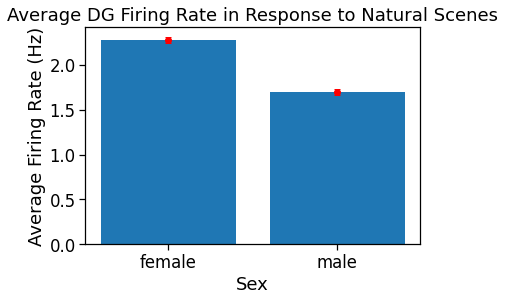

In [126]:

value_list = [dg_male_mean, dg_female_mean]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average DG Firing Rate in Response to Natural Scenes')
standard_error_scenes_list=[standard_error_male_scenes, standard_error_female_scenes]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_scenes_list, fmt='o', color='r', capsize=3)


<ErrorbarContainer object of 3 artists>

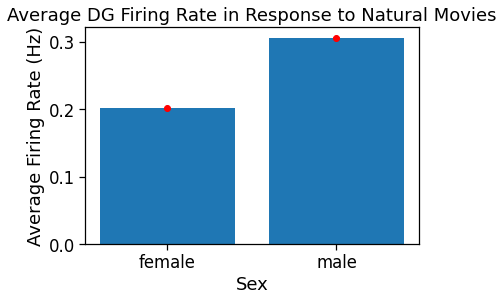

In [127]:
value_list = [dg_female_mean_movies, dg_male_mean_movies]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average DG Firing Rate in Response to Natural Movies')
standard_error_movies_list=[standard_error_male_movies, standard_error_female_movies]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_movies_list, fmt='o', color='r', capsize=3)

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [ ]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [ ]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

## Resources:


### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html


Insert text. 